# Predicting situation in room

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline #shows plots after the command execution

In [22]:
df = pd.read_table("./data/testData200923.txt")

In [65]:
#see how many rows and columns
df.shape 

(341, 65)

In [66]:
#see the first 5 rows
df.head(5) 

,R,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,0,216,217,215,213,214,214,214,209,236,...,-1,-1,1,-7,-30,-13,-9,-1,0,-1
1,0,215,215,215,214,215,214,213,209,220,...,1,0,-1,1,1,1,0,0,-1,-1
2,0,215,215,215,214,214,214,214,209,215,...,0,0,-1,-1,0,0,0,0,0,1
3,0,215,215,215,214,215,215,214,210,215,...,1,1,0,0,0,-1,1,0,1,0
4,0,214,215,214,214,214,214,214,209,214,...,-1,-1,-1,0,0,1,-1,0,-2,-1


In [67]:
#see the last 5 rows
df.tail(5)

,R,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
336,4,215,215,215,215,215,214,213,209,214,...,0,-1,0,1,25,14,17,2,0,0
337,4,214,215,215,215,213,212,212,208,214,...,-2,-1,-1,2,17,14,16,1,-1,-2
338,4,214,214,214,214,213,213,212,208,214,...,0,1,-1,1,24,14,15,1,1,0
339,4,214,214,214,213,215,214,213,209,213,...,1,1,1,1,15,13,16,2,0,-1
340,4,216,225,295,244,214,213,212,208,215,...,1,0,0,1,-4,7,7,0,1,0


In [59]:
#check that values are not null
df.isnull().values.any()

False

In [72]:
#plot correlation method using matplotlib.pyplot
def plot_corr(df, size = 20):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size,size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

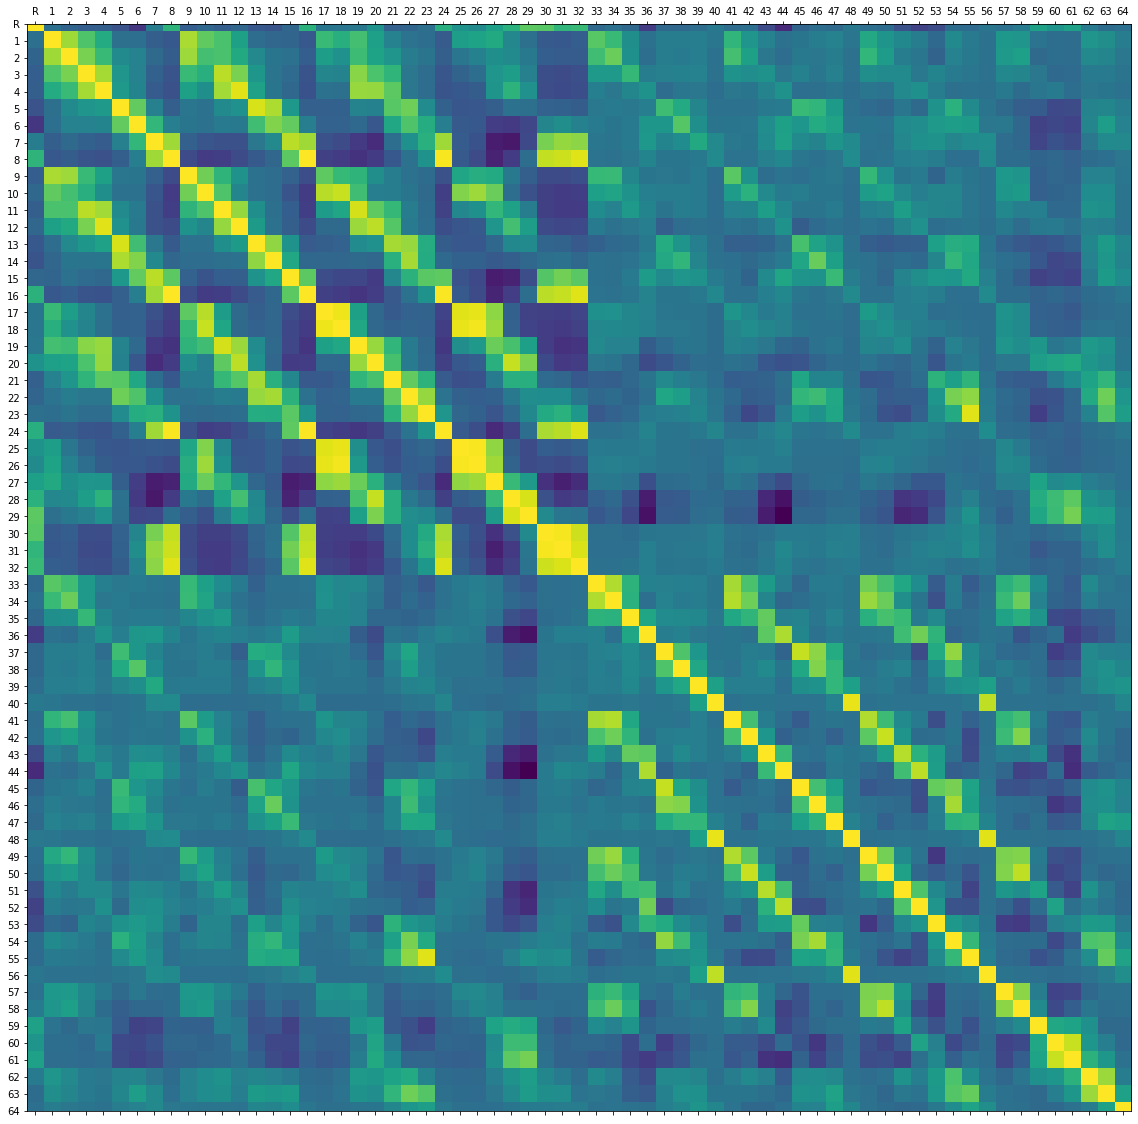

In [73]:
plot_corr(df)

In [62]:
df.corr()

,R,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
R,1.000000,-0.011274,-0.082346,-0.120367,-0.118686,-0.193144,-0.345915,0.069533,0.440352,-0.122051,...,-0.039016,0.026033,-0.006124,0.066422,0.316300,0.227745,0.312674,0.050941,-0.032979,-0.013885
1,-0.011274,1.000000,0.773976,0.560277,0.382727,-0.009635,-0.015051,-0.114126,-0.159040,0.795768,...,0.060056,0.002114,0.251484,0.231472,0.012470,-0.023656,-0.025515,0.233309,0.188820,0.069180
2,-0.082346,0.773976,1.000000,0.679818,0.477204,0.168430,0.106894,-0.044318,-0.125149,0.768300,...,0.048985,0.004104,0.267017,0.306235,-0.044308,-0.021636,-0.029179,0.151478,0.130634,0.035529
3,-0.120367,0.560277,0.679818,1.000000,0.787092,0.235370,0.107914,-0.104859,-0.185132,0.477084,...,0.029108,-0.000222,0.143834,0.131146,0.032560,-0.054544,-0.041041,0.058482,0.063963,0.016794
4,-0.118686,0.382727,0.477204,0.787092,1.000000,0.265364,0.119063,-0.133067,-0.201048,0.309203,...,-0.003755,-0.012153,0.044407,-0.031370,0.025369,0.054858,-0.019945,0.032618,0.023114,0.003255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,0.227745,-0.023656,-0.021636,-0.054544,0.054858,-0.247222,-0.250087,-0.198500,-0.060133,-0.073107,...,-0.129176,-0.032455,-0.279761,-0.241224,0.356570,1.000000,0.864621,0.240894,0.082113,-0.050867
61,0.312674,-0.025515,-0.029179,-0.041041,-0.019945,-0.234858,-0.279786,-0.235826,-0.096397,-0.088507,...,0.010189,-0.022428,-0.258090,-0.123691,0.327627,0.864621,1.000000,0.425100,0.245135,-0.002431
62,0.050941,0.233309,0.151478,0.058482,0.032618,0.113496,0.125565,0.033911,-0.033831,0.111438,...,0.182509,0.011569,-0.065108,0.029727,0.200580,0.240894,0.425100,1.000000,0.758573,0.076915
63,-0.032979,0.188820,0.130634,0.063963,0.023114,0.134033,0.290133,0.160201,-0.014938,0.110560,...,0.618876,0.069375,-0.000874,-0.024060,-0.048454,0.082113,0.245135,0.758573,1.000000,0.318650


In [75]:
r_empty = len(df.loc[df['R'] == 0])
r_move = len(df.loc[df['R'] == 1])
r_tv = len(df.loc[df['R'] == 2])
r_sleep = len(df.loc[df['R'] == 3])
r_fall = len(df.loc[df['R'] == 4])
print("Empty {0}, Moving {1}, TV {2}, Sleep 3 {3}, Fall 4 {4}".format(r_empty, r_move, r_tv, r_sleep, r_fall))

Empty 74, Moving 74, TV 74, Sleep 3 81, Fall 4 38


In [64]:
from sklearn.model_selection import train_test_split

feature_col_names = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33','34','35','36','37','38','39','40','41','42','43','44','45','46','47','48','49','50','51','52','53','54','55','56','57','58','59','60','61','62','63','64']
predicted_class_names = ['R']

X = df[feature_col_names].values     
y = df[predicted_class_names].values 
split_test_size = 0.30

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size, random_state=42)

In [34]:
print("{0:0.2f}% in training set".format((len(X_train)/len(df.index)) * 100))
print("{0:0.2f}% in test set".format((len(X_test)/len(df.index)) * 100))

69.79% in training set
30.21% in test set


In [41]:
print("Original Empty:\t {0} ({1:0.2f}%)".format(len(df.loc[df['R'] == 0]), (len(df.loc[df['R'] == 0])/len(df) * 100.0)))
print("Original Move:\t {0} ({1:0.2f}%)".format(len(df.loc[df['R'] == 1]), (len(df.loc[df['R'] == 1])/len(df) * 100.0)))
print("Original TV:\t {0} ({1:0.2f}%)".format(len(df.loc[df['R'] == 2]), (len(df.loc[df['R'] == 2])/len(df) * 100.0)))
print("Original Sleep:\t {0} ({1:0.2f}%)".format(len(df.loc[df['R'] == 3]), (len(df.loc[df['R'] == 3])/len(df) * 100.0)))
print("Original Fall:\t {0} ({1:0.2f}%)".format(len(df.loc[df['R'] == 4]), (len(df.loc[df['R'] == 4])/len(df) * 100.0)))

Original Empty:	 74 (21.70%)
Original Move:	 74 (21.70%)
Original TV:	 74 (21.70%)
Original Sleep:	 81 (23.75%)
Original Fall:	 38 (11.14%)


In [43]:
print("Training Empty:\t {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train) * 100.0)))
print("Training Move:\t {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train) * 100.0)))
print("Training TV:\t {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 2]), (len(y_train[y_train[:] == 2])/len(y_train) * 100.0)))
print("Training Sleep:\t {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 3]), (len(y_train[y_train[:] == 3])/len(y_train) * 100.0)))
print("Training Fall:\t {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 4]), (len(y_train[y_train[:] == 4])/len(y_train) * 100.0)))

Training Empty:	 52 (21.85%)
Training Move:	 47 (19.75%)
Training TV:	 55 (23.11%)
Training Sleep:	 58 (24.37%)
Training Fall:	 26 (10.92%)


In [44]:
print("Test Empty:\t {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test) * 100.0)))
print("Test Move:\t {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test) * 100.0)))
print("Test TV:\t {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 2]), (len(y_test[y_test[:] == 2])/len(y_test) * 100.0)))
print("Test Sleep:\t {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 3]), (len(y_test[y_test[:] == 3])/len(y_test) * 100.0)))
print("Test Fall:\t {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 4]), (len(y_test[y_test[:] == 4])/len(y_test) * 100.0)))

Test Empty:	 22 (21.36%)
Test Move:	 27 (26.21%)
Test TV:	 19 (18.45%)
Test Sleep:	 23 (22.33%)
Test Fall:	 12 (11.65%)


In [45]:
from sklearn.impute import SimpleImputer

fill_0 = SimpleImputer(missing_values=0, strategy="mean")#, axis=0)
X_train = fill_0.fit_transform(X_train)
X_test = fill_0.fit_transform(X_test)


In [99]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

nb_model = GaussianNB()
nb_model.fit(X_train, y_train.ravel())

nb_predict_train = nb_model.predict(X_train)
print("GaussianNB training data accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, nb_predict_train)))
nb_predict_test = nb_model.predict(X_test)
print("GaussianNB test data accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, nb_predict_test)))

print("GaussianNB Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, nb_predict_test)))
print("GaussianNB Classification Report")
print(metrics.classification_report(y_test, nb_predict_test))

GaussianNB training data accuracy: 0.9874
GaussianNB test data accuracy: 0.9612
GaussianNB Confusion Matrix
[[22  0  0  0  0]
 [ 0 24  0  0  3]
 [ 0  1 18  0  0]
 [ 0  0  0 23  0]
 [ 0  0  0  0 12]]
GaussianNB Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       0.96      0.89      0.92        27
           2       1.00      0.95      0.97        19
           3       1.00      1.00      1.00        23
           4       0.80      1.00      0.89        12

    accuracy                           0.96       103
   macro avg       0.95      0.97      0.96       103
weighted avg       0.97      0.96      0.96       103



In [100]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42, n_estimators=10)
rf_model.fit(X_train, y_train.ravel())

rf_predict_train = rf_model.predict(X_train)
print("RandomForestClassifier training data accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, rf_predict_train)))
rf_predict_test = rf_model.predict(X_test)
print("RandomForestClassifier test data accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, rf_predict_test)))

print("RandomForestClassifier Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, rf_predict_test)))
print("RandomForestClassifier Classification Report")
print(metrics.classification_report(y_test, rf_predict_test))

RandomForestClassifier training data accuracy: 0.9958
RandomForestClassifier test data accuracy: 0.9806
RandomForestClassifier Confusion Matrix
[[22  0  0  0  0]
 [ 0 27  0  0  0]
 [ 0  0 19  0  0]
 [ 0  0  0 23  0]
 [ 0  2  0  0 10]]
RandomForestClassifier Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       0.93      1.00      0.96        27
           2       1.00      1.00      1.00        19
           3       1.00      1.00      1.00        23
           4       1.00      0.83      0.91        12

    accuracy                           0.98       103
   macro avg       0.99      0.97      0.97       103
weighted avg       0.98      0.98      0.98       103



In [101]:
from sklearn.linear_model import LogisticRegression

lr_model =LogisticRegression(C=0.7, solver='liblinear', random_state=42)
lr_model.fit(X_train, y_train.ravel())

lr_predict_train = lr_model.predict(X_train)
print("LogisticRegression training data accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, lr_predict_train)))
lr_predict_test = lr_model.predict(X_test)
print("LogisticRegression test data accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_predict_test)))

print("LogisticRegression Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, lr_predict_test)))
print("LogisticRegression Classification Report")
print(metrics.classification_report(y_test, lr_predict_test))

LogisticRegression training data accuracy: 1.0000
LogisticRegression test data accuracy: 0.9515
LogisticRegression Confusion Matrix
[[22  0  0  0  0]
 [ 1 24  0  1  1]
 [ 0  1 18  0  0]
 [ 0  0  0 23  0]
 [ 0  1  0  0 11]]
LogisticRegression Classification Report
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        22
           1       0.92      0.89      0.91        27
           2       1.00      0.95      0.97        19
           3       0.96      1.00      0.98        23
           4       0.92      0.92      0.92        12

    accuracy                           0.95       103
   macro avg       0.95      0.95      0.95       103
weighted avg       0.95      0.95      0.95       103



C:\Users\ainar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [57]:
C_start = 0.1
C_end = 5
C_inc = 0.1

C_values, recall_scores = [], []
C_val = C_start
best_recall_score = 0
while (C_val < C_end):
    C_values.append(C_val)
    lr_model_loop = LogisticRegression(C=C_val, solver='liblinear', random_state=42)
    lr_model_loop.fit(X_train, y_train.ravel())
    lr_predict_loop_test = lr_model_loop.predict(X_test)
    recall_score = metrics.recall_score(y_test, lr_predict_loop_test)
    recall_scores.append(recall_score)
    if (recall_score > best_recall_score):
        best_recall_score = recall_score
        best_lr_predict_test = lr_predict_loop_test

    C_val = C_val + C_inc

best_score_C_val = C_values[recall_scores.index(best_recall_score)]
print("1st max value of {0:.3f} occured at C={1:.3f}".format(best_recall_score, best_score_C_val))

%matplotlib inline 
plt.plot(C_values, recall_scores, "-")
plt.xlabel("C value")
plt.ylabel("recall score")

C:\Users\ainar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

In [58]:
C_start = 0.1
C_end = 5
C_inc = 0.1

C_values, recall_scores = [], []
C_val = C_start
best_recall_score = 0
while (C_val < C_end):
    C_values.append(C_val)
    lr_model_loop = LogisticRegression(C=C_val, class_weight="balanced", solver='liblinear', random_state=42)
    lr_model_loop.fit(X_train, y_train.ravel())
    lr_predict_loop_test = lr_model_loop.predict(X_test)
    recall_score = metrics.recall_score(y_test, lr_predict_loop_test)
    recall_scores.append(recall_score)
    if (recall_score > best_recall_score):
        best_recall_score = recall_score
        best_lr_predict_test = lr_predict_loop_test

    C_val = C_val + C_inc

best_score_C_val = C_values[recall_scores.index(best_recall_score)]
print("1st max value of {0:.3f} occured at C={1:.3f}".format(best_recall_score, best_score_C_val))

%matplotlib inline 
plt.plot(C_values, recall_scores, "-")
plt.xlabel("C value")
plt.ylabel("recall score")

C:\Users\ainar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

In [30]:
from sklearn.linear_model import LogisticRegression

lr_model =LogisticRegression( class_weight="balanced", C=best_score_C_val, solver='liblinear', random_state=42)
lr_model.fit(X_train, y_train.ravel())
lr_predict_test = lr_model.predict(X_test)

print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_predict_test)))
print(metrics.confusion_matrix(y_test, lr_predict_test) )
print("Classification Report")
print(metrics.classification_report(y_test, lr_predict_test))

Accuracy: 1.0000
[[23  0]
 [ 0  3]]
Classification Report
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00         3

    accuracy                           1.00        26
   macro avg       1.00      1.00      1.00        26
weighted avg       1.00      1.00      1.00        26



In [59]:
from sklearn.linear_model import LogisticRegressionCV
lr_cv_model = LogisticRegressionCV(n_jobs=-1, random_state=42, Cs=3, cv=10, refit=False, class_weight="balanced")
lr_cv_model.fit(X_train, y_train.ravel())

ValueError: n_splits=10 cannot be greater than the number of members in each class.

In [60]:
lr_cv_predict_test = lr_cv_model.predict(X_test)

print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_cv_predict_test)))
print(metrics.confusion_matrix(y_test, lr_cv_predict_test) )
print("Classification Report")
print(metrics.classification_report(y_test, lr_cv_predict_test))

NotFittedError: This LogisticRegressionCV instance is not fitted yet